In [ ]:
# random forest regressor code for all experiments
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

shopping_dataset_RF = pd.read_csv('shopping_trends_updated.csv')
shopping_dataset_RF.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
# drop 'Customer ID' as it is not a feature
shopping_dataset_RF = shopping_dataset_RF.drop(columns=['Customer ID'])

# define features and target variables for purchase amount prediction
X_amount = shopping_dataset_RF.drop(columns=['Purchase Amount (USD)', 'Frequency of Purchases'])
y_amount = shopping_dataset_RF['Purchase Amount (USD)']

# define features and target variable for purchase frequency prediction
X_frequency = shopping_dataset_RF.drop(columns=['Purchase Amount (USD)', 'Frequency of Purchases'])
y_frequency = shopping_dataset_RF['Frequency of Purchases']

# encode categorical variables
categorical_features = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season',
                        'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method']
numeric_features = ['Age', 'Review Rating', 'Previous Purchases']

# columnTransformer for encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# train-test split for purchase amount
X_train_amount, X_test_amount, y_train_amount, y_test_amount = train_test_split(X_amount, y_amount, test_size=0.2, random_state=42)

# train-test split for purchase frequency
X_train_frequency, X_test_frequency, y_train_frequency, y_test_frequency = train_test_split(X_frequency, y_frequency, test_size=0.2, random_state=42)

Purchase Amount Prediction Metrics:
MAE: 20.911705128205128
MSE: 576.5825873076923
RMSE: 24.01213416811784
R² Score: -0.030380184168940172
Cross-Validation R² Scores (Purchase Amount): [-0.01282406 -0.04368401 -0.04020811 -0.03041035 -0.04447561]
Mean CV R² Score (Purchase Amount): -0.034320429649299336


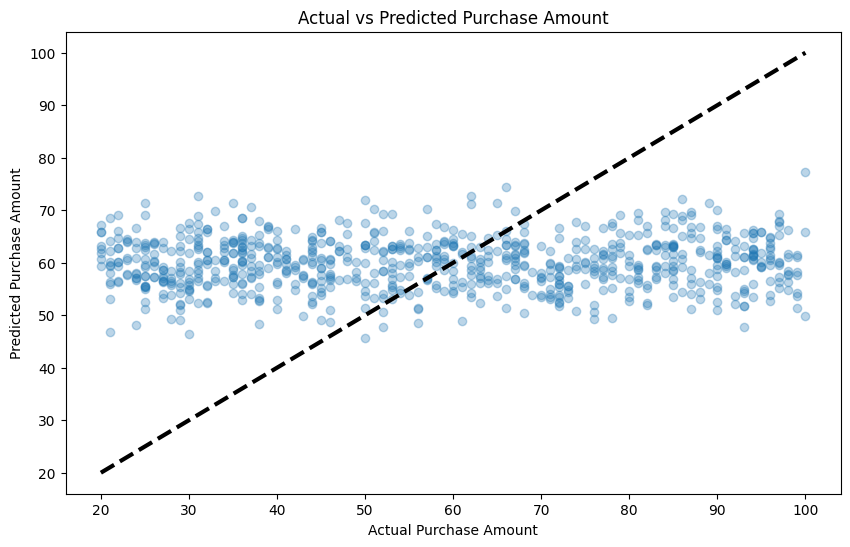

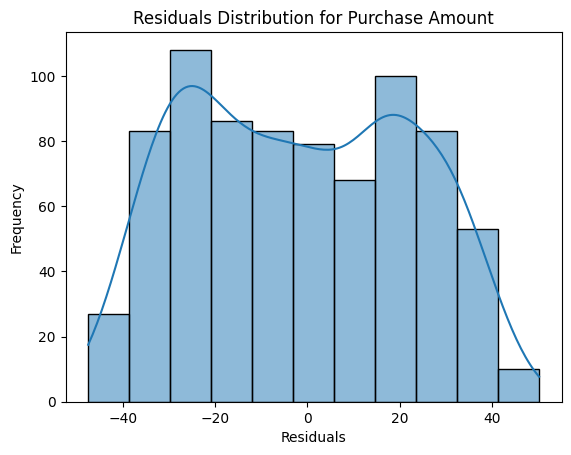

In [ ]:
# apply transformations to the training and testing data for purchase amount
X_train_amount_transformed = preprocessor.fit_transform(X_train_amount)
X_test_amount_transformed = preprocessor.transform(X_test_amount)

# build Random Forest Regressor model for purchase amount
rf_regressor_amount = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_amount.fit(X_train_amount_transformed, y_train_amount)

# predictions for purchase amount
y_pred_amount = rf_regressor_amount.predict(X_test_amount_transformed)

# evaluation metrics for purchase amount
mae_amount = mean_absolute_error(y_test_amount, y_pred_amount)
mse_amount = mean_squared_error(y_test_amount, y_pred_amount)
rmse_amount = np.sqrt(mse_amount)
r2_amount = r2_score(y_test_amount, y_pred_amount)

print("Purchase Amount Prediction Metrics:")
print(f"MAE: {mae_amount}")
print(f"MSE: {mse_amount}")
print(f"RMSE: {rmse_amount}")
print(f"R² Score: {r2_amount}")

# cross-validation scores for purchase amount
cv_scores_amount = cross_val_score(rf_regressor_amount, preprocessor.fit_transform(X_amount), y_amount, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores (Purchase Amount): {cv_scores_amount}")
print(f"Mean CV R² Score (Purchase Amount): {cv_scores_amount.mean()}")

# actual vs predicted plot for purchase amount
plt.figure(figsize=(10,6))
plt.scatter(y_test_amount, y_pred_amount, alpha=0.3)
plt.plot([y_test_amount.min(), y_test_amount.max()], [y_test_amount.min(), y_test_amount.max()], 'k--', lw=3)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Actual vs Predicted Purchase Amount')
plt.show()

# residuals distribution for purchase amount
residuals_amount = y_test_amount - y_pred_amount
sns.histplot(residuals_amount, kde=True)
plt.title('Residuals Distribution for Purchase Amount')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
import numpy as np

shopping_dataset_mod = pd.read_csv("shopping_trends_updated.csv")

# encoding categorical variables
categorical_features = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']
numeric_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

X = shopping_dataset_mod.drop(['Customer ID'], axis=1)
X = preprocessor.fit_transform(X)


In [ ]:
# question: How can insights help prevent understocking and overstocking?

# assuming 'Purchase Amount (USD)' as the target for regression
y = shopping_dataset_mod['Purchase Amount (USD)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
rf_model_stock = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_stock.fit(X_train, y_train)

# predictions and Evaluation
y_pred_stock = rf_model_stock.predict(X_test)
print("Random Forest Regression Report (Stock):\n", classification_report(y_test, y_pred_stock))
print("Confusion Matrix (Stock):\n", confusion_matrix(y_test, y_pred_stock))

# cross-validation
cv_scores_stock = cross_val_score(rf_model_stock, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (Stock): {cv_scores_stock}")
print(f"Mean CV Accuracy (Stock): {np.mean(cv_scores_stock)}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Regression Report (Stock):
               precision    recall  f1-score   support

          20       0.62      1.00      0.76         8
          21       0.30      0.27      0.29        11
          22       0.12      0.10      0.11        10
          23       0.28      1.00      0.44         7
          24       0.36      0.50      0.42        10
          25       0.40      0.33      0.36        18
          26       0.18      0.22      0.20         9
          27       0.20      0.08      0.12        12
          28       0.27      0.50      0.35         8
          29       0.28      0.33      0.30        15
          30       0.20      0.15      0.17        13
          31       0.30      0.19      0.23        16
          32       0.18      0.25      0.21        12
          33       0.00      0.00      0.00         5
          34       0.12      0.11      0.12         9
          35       0.10      0.07      0.08        14
          36       0.40      0.10      

In [ ]:
# question: How do purchasing patterns vary by season?

# 'Season' as the target for classification
y = shopping_dataset_mod['Season']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
rf_model_season = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_season.fit(X_train, y_train)

# predictions and Evaluation
y_pred_season = rf_model_season.predict(X_test)
print("Random Forest Classification Report (Season):\n", classification_report(y_test, y_pred_season))
print("Confusion Matrix (Season):\n", confusion_matrix(y_test, y_pred_season))

# cross-validation
cv_scores_season = cross_val_score(rf_model_season, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (Season): {cv_scores_season}")
print(f"Mean CV Accuracy (Season): {np.mean(cv_scores_season)}")


Random Forest Classification Report (Season):
               precision    recall  f1-score   support

        Fall       1.00      1.00      1.00       215
      Spring       1.00      1.00      1.00       201
      Summer       1.00      1.00      1.00       190
      Winter       1.00      1.00      1.00       174

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780

Confusion Matrix (Season):
 [[215   0   0   0]
 [  0 201   0   0]
 [  0   0 190   0]
 [  0   0   0 174]]
Cross-Validation Scores (Season): [1. 1. 1. 1. 1.]
Mean CV Accuracy (Season): 1.0


In [ ]:
# question: Are current marketing strategies effective in promoting discounts and sales?

# 'Discount Applied' as the target for classification
y = shopping_dataset_mod['Discount Applied'].map({'Yes': 1, 'No': 0})

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
rf_model_discount = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_discount.fit(X_train, y_train)

# predictions and evaluation
y_pred_discount = rf_model_discount.predict(X_test)
print("Random Forest Classification Report (Discount Applied):\n", classification_report(y_test, y_pred_discount))
print("Confusion Matrix (Discount Applied):\n", confusion_matrix(y_test, y_pred_discount))

# cross-validation
cv_scores_discount = cross_val_score(rf_model_discount, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (Discount Applied): {cv_scores_discount}")
print(f"Mean CV Accuracy (Discount Applied): {np.mean(cv_scores_discount)}")


Random Forest Classification Report (Discount Applied):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00       358

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780

Confusion Matrix (Discount Applied):
 [[422   0]
 [  0 358]]
Cross-Validation Scores (Discount Applied): [1. 1. 1. 1. 1.]
Mean CV Accuracy (Discount Applied): 1.0
